In [1]:
import numpy as np
import cv2
import pandas as pd
import PIL
import utm

In [11]:
video_name = 'Help'
data = pd.read_fwf('data/head_tracking_data/Subject_1/' + video_name + '.txt', header=None)

data.columns = ['latitude', 'longitude']

cap = cv2.VideoCapture('data/video_files/' + video_name + '.mp4')

length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

calc_mod = round(1/(round((length/len(data)),2)-1))

In [12]:
# Converting longitude/latitude coordinates to mercator zones
lst = []
for i in range(len(data)):
    u = utm.from_latlon(data.iloc[i].latitude, data.iloc[i].longitude)
    lst.append(u[2:]) # from 2nd column because those are the zones we're interested in
    
xy = pd.DataFrame(lst)    

In [14]:
# concatenate zones and zone bands to dataframe
coords = pd.concat([data, xy],axis=1)
coords.columns = ['latitude', 'longitude', 'zone', 'band']

In [15]:
# convert letters to numbers - issue exists because mercator zones omit the letters "I" and "O"
coords['n_band'] = [ ord(x) - 64 for x in coords.band ]

In [38]:
coords.describe()

,latitude,longitude,zone,n_band
count,618.000000,618.000000,618.000000,618.000000
mean,4.732776,70.366402,42.283172,14.220065
std,4.894504,45.374838,7.570677,0.898469
min,-11.558613,-67.861549,19.000000,12.000000
25%,2.090104,50.828335,39.000000,14.000000
50%,5.255124,89.956080,45.000000,14.000000
75%,7.704092,93.738930,46.000000,14.000000
max,15.275564,152.665727,56.000000,16.000000


In [41]:
# Probably here we can work out the size of a tile
bins_zone = [i*5 for i in range(1,13)]
labels_zone = [i for i in range(1,12)]

bins_band = [i*4 for i in range(1,7)]
labels_band = [i for i in range(1,6)]

# binning results
coords['bin_zone'] = pd.DataFrame(pd.cut(coords['zone'], bins=bins_zone, labels=labels_zone))
coords['label_zone'] = pd.DataFrame(pd.cut(coords['n_band'], bins=bins_band, labels=labels_band))

In [72]:
coords[['bin_zone' , 'label_zone']].head(3)

,bin_zone,label_zone
0,6,3
1,6,3
2,6,3


In [48]:
import matplotlib.pyplot as plt
import networkx as nx

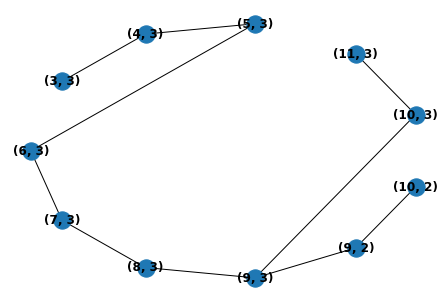

In [70]:
# G = nx.petersen_graph()
G = nx.Graph()

for i in range(len(coords)-1):
    G.add_edge((coords.iloc[i]['bin_zone'], coords.iloc[i]['label_zone']), (coords.iloc[i+1]['bin_zone'], coords.iloc[i+1]['label_zone']))
    
nx.draw_shell(G, with_labels=True, font_weight='bold')